#2장. 머신러닝 프로젝트 처음부터 끝까지

부동산 가격 예측 모델링

#데이터 다운로드

책에서 준비한 깃허브 링크를 통해 다운로드

원 코드와 상이한 부분이 있음에 유의

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

#데이터 구조 훑어보기

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


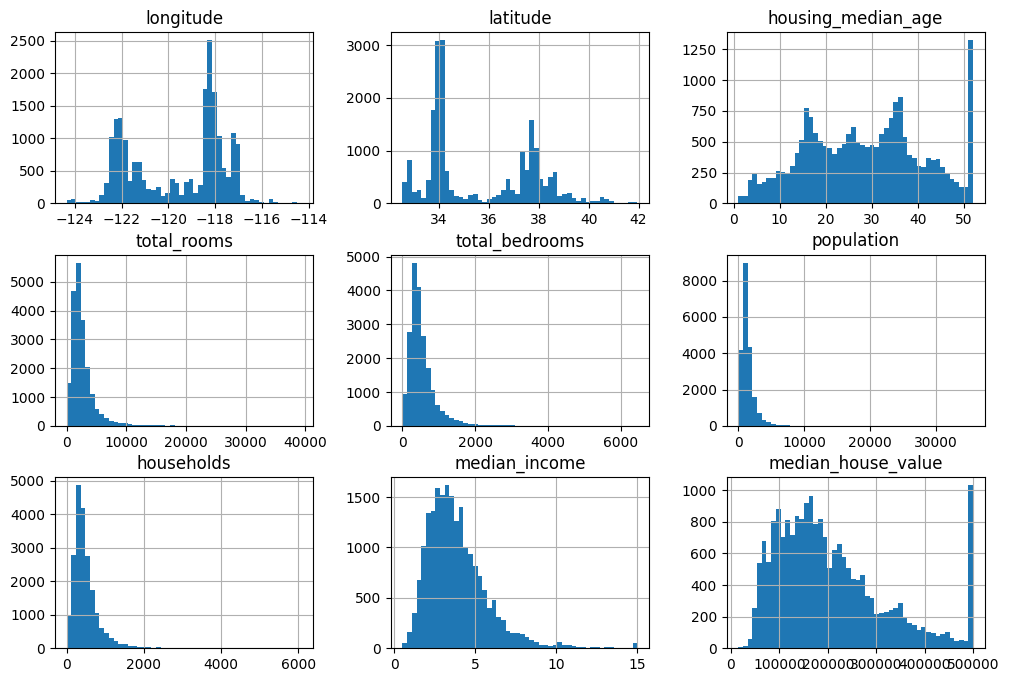

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12,8))
plt.show()

#테스트 세트 만들기

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=249)


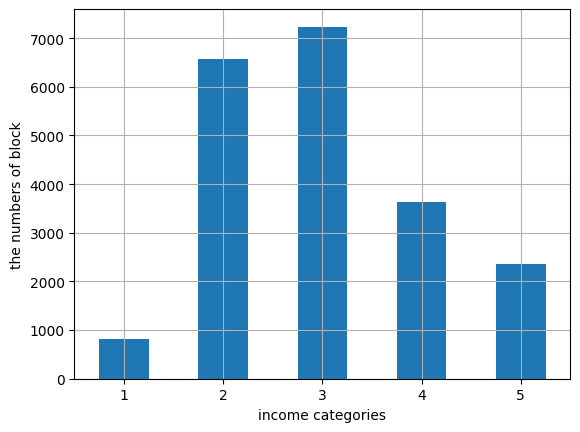

In [10]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("income categories")
plt.ylabel("the numbers of block")
plt.show()

In [11]:
'''
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=249)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])
'''

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=249)

In [12]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

#데이터 이해를 위한 탐색과 시각화

In [13]:
housing = strat_train_set.copy()

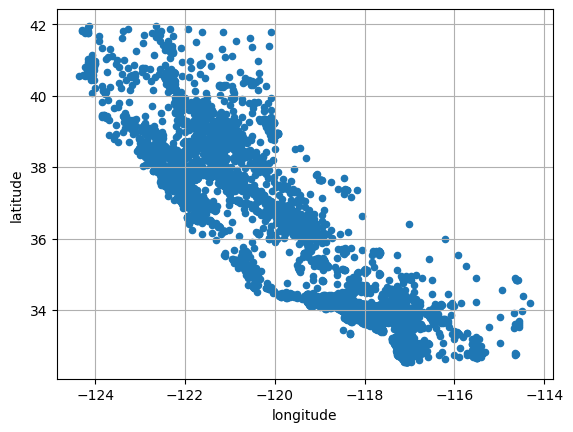

In [15]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             grid=True)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

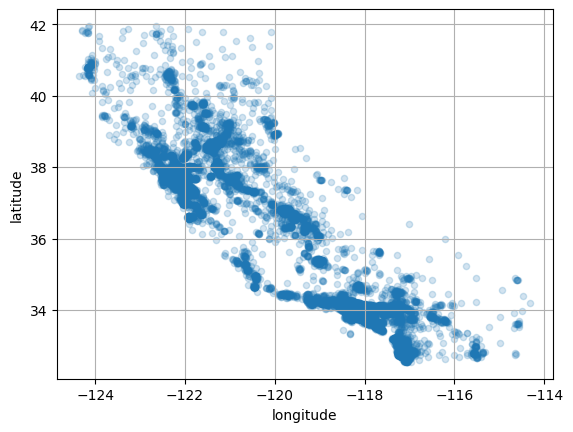

In [16]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             grid=True,
             alpha=0.2)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

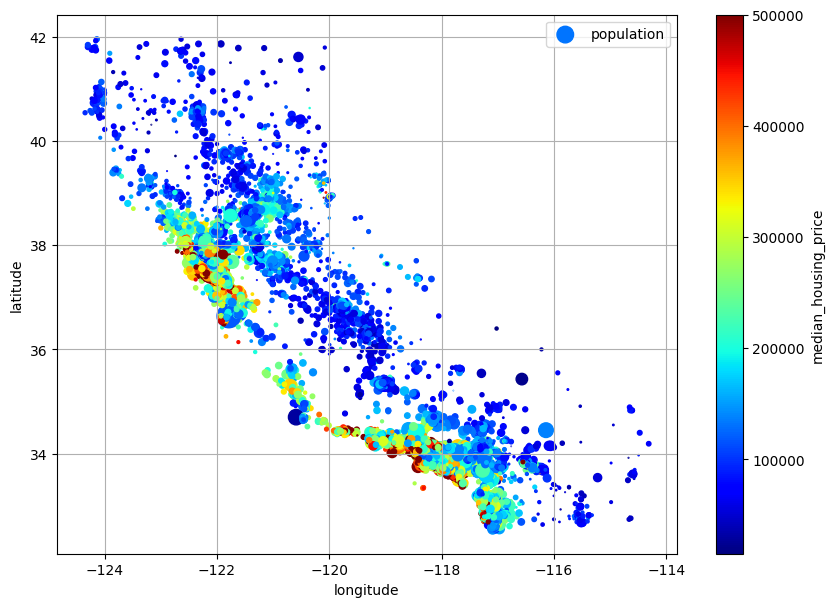

In [25]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             grid=True,
             s=housing.population/100,
             label="population",
             c="median_house_value",
             cmap="jet",
             colorbar=True,
             legend=True,
             sharex=False,
             figsize=(10,7))


cax = plt.gcf().get_axes()[1]
cax.set_ylabel("median_housing_price")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [27]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix.median_house_value.sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688083
total_rooms,0.143890
housing_median_age,0.108324
households,0.074348
total_bedrooms,0.059600
population,-0.015617
longitude,-0.053292
latitude,-0.138889


In [31]:
housing["rooms_per_house"] = housing.total_rooms / housing.households
housing["bedrooms_ratio"] = housing.total_bedrooms / housing.total_rooms
housing["population_per_house"] = housing.population / housing.households

corr_matrix = housing.corr(numeric_only=True)
corr_matrix.median_house_value.sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688083
rooms_per_house,0.146899
total_rooms,0.143890
housing_median_age,0.108324
households,0.074348
total_bedrooms,0.059600
population,-0.015617
population_per_house,-0.034307
longitude,-0.053292
